In [5]:
import pandas as pd 
import numpy as np 
import re

returns = pd.read_csv('/home/trungnguyen21/Desktop/mlj-lead-lag-main/data/returns_matrix.csv')
volume_df = pd.read_csv('/home/trungnguyen21/Desktop/mlj-lead-lag-main/data/volume.csv')

print(returns.shape)
returns.head()


(5030, 501)


,date,A,AA,AAP,ABB,ABC,ABT,ABX,ACN,ADM,...,WMT,WR,WRI,WSM,WY,X,XL,XOM,XRX,YUM
0,2000-01-04,-0.093663,0.004622,0.000000,0.0,0.0,-0.028987,-0.014235,0.004988,-0.010472,...,-0.040043,0.033523,-0.006557,-0.032026,-0.038291,-0.038043,-0.046057,-0.017742,-0.047628,-0.020306
1,2000-01-05,-0.049840,0.056048,-0.003515,0.0,0.0,-0.001840,0.017762,-0.010000,-0.015915,...,-0.019647,0.050010,-0.001646,0.005900,0.051619,0.010152,0.008877,0.053082,0.018792,0.005115
2,2000-01-06,-0.055627,-0.013167,0.007017,0.0,0.0,0.034393,0.000000,0.005012,0.005334,...,0.010854,-0.006993,0.001646,-0.223144,0.045717,0.006043,0.007547,0.048202,0.010582,-0.008539
3,2000-01-07,0.096850,-0.002950,0.000000,0.0,0.0,0.010619,-0.024957,0.004988,0.015831,...,0.072845,-0.010582,0.041874,-0.016682,-0.033437,0.025769,0.064303,-0.000735,0.023408,-0.022550
4,2000-01-10,0.058813,-0.002958,-0.003503,0.0,0.0,-0.007067,0.000000,0.009901,0.000000,...,-0.018417,-0.017889,0.010980,0.033091,-0.004369,-0.007859,0.015160,-0.014080,-0.023408,0.039558


In [6]:
print("Ticker còn lại:", returns.columns.tolist()[:5])
print("Ngày đầu tiên:", returns.index.min())
print("Ngày cuối cùng:", returns.index.max())


Ticker còn lại: ['date', 'A', 'AA', 'AAP', 'ABB']
Ngày đầu tiên: 0
Ngày cuối cùng: 5029


In [7]:
# Map sic to sector
def map_sic_to_sector(sic_code):
    if 100 <= sic_code <= 999:
        return 0
    elif 1000 <= sic_code <= 1499:
        return 1
    elif 1500 <= sic_code <= 1799:
        return 2
    elif 2000 <= sic_code <= 3999:
        return 3
    elif 4000 <= sic_code <= 4999:
        return 4
    elif 5000 <= sic_code <= 5199:
        return 5
    elif 5200 <= sic_code <= 5999:
        return 6
    elif 6000 <= sic_code <= 6799:
        return 7
    elif 7000 <= sic_code <= 8999:
        return 8
    elif 9000 <= sic_code <= 9999:
        return 9
    else:
        return -1  # unknown


In [8]:

df = pd.read_csv("/home/trungnguyen21/Desktop/mlj-lead-lag-main/data/data1006ver2.csv", parse_dates=['date'])
df['DOLLAR_VOLUME'] = df['PRC'].abs() * df['VOL']

def clean_siccd(s):
    s = str(s) 
    match = re.search(r'\d+', s)
    return int(match.group()) if match else -1


df_sic = df[['TICKER', 'SICCD']].drop_duplicates()
df_sic['SIC_INT'] = df_sic['SICCD'].apply(clean_siccd)

df_sic['SIC_INT'] = pd.to_numeric(df_sic['SIC_INT'], errors='coerce')
df_sic = df_sic.dropna(subset=['SIC_INT'])
df_sic['SIC_INT'] = df_sic['SIC_INT'].astype(int)


df_sic['SIC_GROUP'] = df_sic['SIC_INT'].apply(map_sic_to_sector)
df_sic = df_sic[df_sic['SIC_GROUP'] >0]
df_sic


<ipython-input-8-e8630c58b04b>:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/trungnguyen21/Desktop/mlj-lead-lag-main/data/data1006ver2.csv", parse_dates=['date'])


,TICKER,SICCD,SIC_INT,SIC_GROUP
0,ASO,6711,6711,7
251,ASO,6712,6712,7
1033,ASO,6022,6022,7
1721,BUD,2082,2082,3
3954,RKY,2082,2082,3
...,...,...,...,...
12782836,BRMK,6798,6798,7
12782867,PINE,6798,6798,7
12782893,JIH,2782,2782,3
12782907,SI,6022,6022,7


## Chạy kiểm tra ma trận Lead Lag

In [71]:
# Thay file Pickle cần thực nghiệm
import pandas as pd 
LL = pd.read_pickle("lead_lag_matrix_log_return_with_volume.pkl")

In [72]:
LL


,A,AA,AAP,ABB,ABC,ABT,ABX,ACN,ADM,ADS,...,WMT,WR,WRI,WSM,WY,X,XL,XOM,XRX,YUM
A,0.000000,-0.527273,0.552088,0.523725,0.516735,0.518533,0.536697,0.519290,0.521900,0.581517,...,-0.508524,0.547657,0.556849,0.529158,-0.510235,-0.540513,0.523586,0.502187,-0.512377,0.528714
AA,0.527273,0.000000,0.568197,0.572616,0.579095,0.514329,0.532578,0.563956,0.530287,0.597783,...,0.539334,0.577149,0.556418,0.543615,0.510176,-0.511540,0.545307,0.526464,0.516384,0.531563
AAP,-0.552088,-0.568197,0.000000,-0.526941,-0.518224,-0.536068,-0.533498,-0.533187,-0.552336,-0.508003,...,-0.540116,-0.505409,-0.513990,-0.531934,-0.542046,-0.592064,-0.515524,-0.555574,-0.559921,-0.529519
ABB,-0.523725,-0.572616,0.526941,0.000000,0.514449,-0.529702,-0.516545,-0.513284,-0.514834,0.517008,...,0.502596,0.510044,0.507090,-0.516873,-0.526670,-0.558108,-0.500098,-0.520635,-0.544664,-0.517220
ABC,-0.516735,-0.579095,0.518224,-0.514449,0.000000,-0.544772,-0.524651,-0.501164,-0.518280,-0.500426,...,-0.532364,0.534639,-0.505731,0.501177,-0.542386,-0.570925,-0.532828,-0.558820,-0.556737,0.514961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X,0.540513,0.511540,0.592064,0.558108,0.570925,0.542579,0.523694,0.521664,0.534809,0.571050,...,0.556564,0.606297,0.559362,0.513121,-0.501299,0.000000,0.554031,0.537714,0.518463,0.553712
XL,-0.523586,-0.545307,0.515524,0.500098,0.532828,-0.545638,-0.522080,-0.516929,-0.547191,0.529512,...,-0.531036,0.520111,0.511088,-0.517258,-0.534802,-0.554031,0.000000,-0.544720,-0.543573,-0.513215
XOM,-0.502187,-0.526464,0.555574,0.520635,0.558820,0.519497,0.514794,0.539280,0.513776,0.558699,...,0.519741,0.561525,0.561175,0.529906,-0.518298,-0.537714,0.544720,0.000000,-0.520147,0.524541
XRX,0.512377,-0.516384,0.559921,0.544664,0.556737,-0.507629,0.531124,0.532092,0.530465,0.568387,...,0.506835,0.584957,0.538282,0.520477,0.501359,-0.518463,0.543573,0.520147,0.000000,0.536356


In [73]:
tickers = LL.columns.to_numpy()
skew = LL.values - LL.values.T
row_sum = skew.sum(axis=1)

df_meta = pd.DataFrame({'TICKER': tickers, 'ROW_SUM': row_sum})
df_meta = df_meta.merge(df_sic, on='TICKER', how='left')

In [74]:
df_meta = df_meta.sort_values(by=['SIC_GROUP', 'ROW_SUM'], ascending=[True, False])
# Lấy thứ tự vị trí (index) của từng ticker sau khi sort
sorted_labels = df_meta['TICKER'].values
sorted_idx = [LL.columns.get_loc(tkr) for tkr in sorted_labels]

sorted_matrix = skew[sorted_idx][:, sorted_idx]


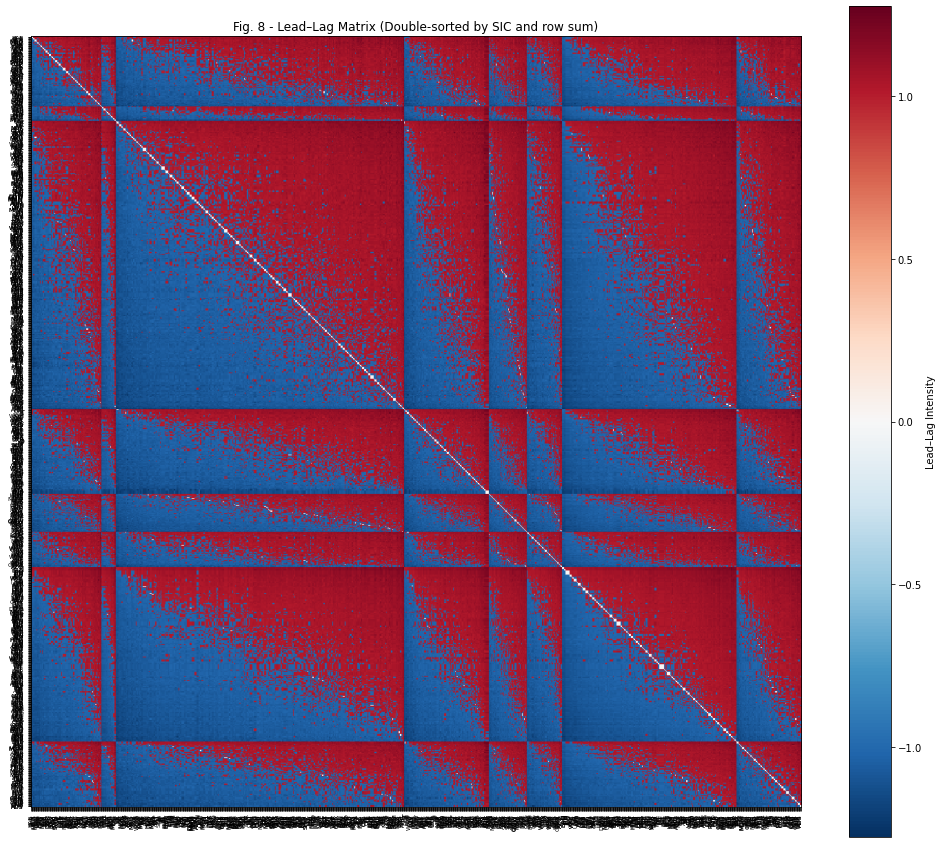

In [75]:
# Kết quả trước khi dùng Hermitian clustering
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))
im = plt.imshow(sorted_matrix, cmap='RdBu_r', vmin=-np.abs(skew).max(), vmax=np.abs(skew).max())
plt.colorbar(im, label='Lead–Lag Intensity')
plt.xticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels, fontsize=6, rotation=90)
plt.yticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels, fontsize=6)
plt.title("Fig. 8 - Lead–Lag Matrix (Double-sorted by SIC and row sum)")
plt.tight_layout()
plt.show()


## Chạy Hermitian Clustering

In [76]:
from code.models.herm_matrix_algo import get_ordered_clustering 


In [77]:
skew = LL.values - LL.values.T
skew_df = pd.DataFrame(skew, index=LL.index, columns=LL.columns)
skew_df.head()


,A,AA,AAP,ABB,ABC,ABT,ABX,ACN,ADM,ADS,...,WMT,WR,WRI,WSM,WY,X,XL,XOM,XRX,YUM
A,0.000000,-1.054546,1.104176,1.047451,1.033471,1.037066,1.073394,1.038580,1.043800,1.163034,...,-1.017049,1.095314,1.113697,1.058316,-1.020469,-1.081027,1.047172,1.004374,-1.024753,1.057429
AA,1.054546,0.000000,1.136394,1.145233,1.158190,1.028659,1.065155,1.127912,1.060573,1.195567,...,1.078669,1.154298,1.112835,1.087230,1.020352,-1.023080,1.090614,1.052928,1.032768,1.063127
AAP,-1.104176,-1.136394,0.000000,-1.053882,-1.036447,-1.072136,-1.066996,-1.066374,-1.104672,-1.016005,...,-1.080232,-1.010817,-1.027979,-1.063869,-1.084093,-1.184129,-1.031048,-1.111149,-1.119843,-1.059038
ABB,-1.047451,-1.145233,1.053882,0.000000,1.028898,-1.059404,-1.033089,-1.026569,-1.029668,1.034017,...,1.005192,1.020088,1.014179,-1.033747,-1.053341,-1.116216,-1.000197,-1.041269,-1.089328,-1.034440
ABC,-1.033471,-1.158190,1.036447,-1.028898,0.000000,-1.089544,-1.049302,-1.002328,-1.036561,-1.000851,...,-1.064728,1.069278,-1.011462,1.002354,-1.084773,-1.141850,-1.065657,-1.117640,-1.113474,1.029922


In [78]:
clusters = get_ordered_clustering(skew_df, num_clusters=10)

In [79]:
tickers = LL.columns.to_numpy()

df_clusters = pd.DataFrame({
    'TICKER': tickers,
    'CLUSTER': clusters,
    'LEADINGNESS': skew.sum(axis=1)  # tổng row A - A.T
})


In [80]:
df_clusters

,TICKER,CLUSTER,LEADINGNESS
A,A,0,422.269674
AA,AA,0,526.046854
AAP,AAP,9,-433.958199
ABB,ABB,6,-130.597466
ABC,ABC,4,-257.292212
...,...,...,...
X,X,0,526.648634
XL,XL,8,-145.090377
XOM,XOM,0,417.384053
XRX,XRX,0,470.644120


In [81]:
# df_sic = df[['TICKER', 'SICCD']].drop_duplicates()
# df_sic['SICCD'] = pd.to_numeric(df_sic['SICCD'], errors='coerce')
# df_sic = df_sic.dropna(subset=['SICCD'])
# df_sic['SICCD'] = df_sic['SICCD'].astype(int)
# df_sic['SIC_GROUP'] = df_sic['SICCD'].apply(map_sic_to_sector)


In [82]:
# df_sic

In [83]:
df_clusters = df_clusters.merge(df_sic[['TICKER', 'SIC_GROUP']], on='TICKER', how='left')


In [84]:
df_clusters

,TICKER,CLUSTER,LEADINGNESS,SIC_GROUP
0,A,0,422.269674,3
1,A,0,422.269674,3
2,AA,0,526.046854,3
3,AA,0,526.046854,3
4,AA,0,526.046854,3
...,...,...,...,...
1113,XOM,0,417.384053,1
1114,XRX,0,470.644120,3
1115,XRX,0,470.644120,3
1116,XRX,0,470.644120,7


In [85]:
import numpy as np
import pandas as pd

n_clusters = df_clusters['CLUSTER'].nunique()
n_sectors = df_clusters['SIC_GROUP'].nunique()

jaccard = np.zeros((n_sectors, n_clusters))

for s in range(n_sectors):
    tickers_sic = set(df_clusters[df_clusters['SIC_GROUP'] == s]['TICKER'])
    for c in range(n_clusters):
        tickers_cluster = set(df_clusters[df_clusters['CLUSTER'] == c]['TICKER'])
        intersection = tickers_sic & tickers_cluster
        union = tickers_sic | tickers_cluster
        jaccard[s, c] = len(intersection) / len(union) if union else 0


### Fig 9

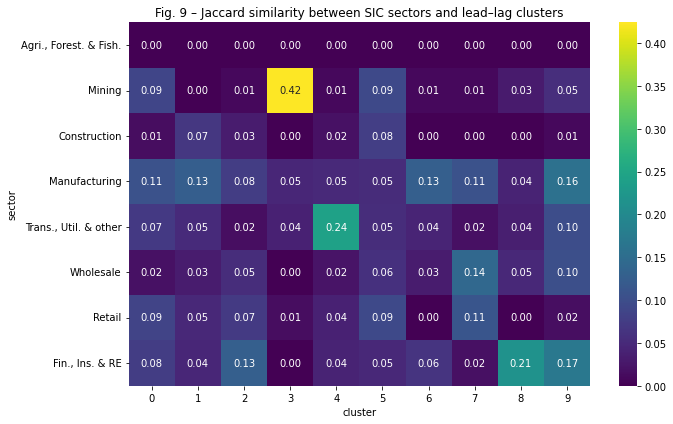

In [86]:
#Fig 9
import matplotlib.pyplot as plt
import seaborn as sns

sic_names = {
    0: 'Agri., Forest. & Fish.',
    1: 'Mining',
    2: 'Construction',
    3: 'Manufacturing',
    4: 'Trans., Util. & other',
    5: 'Wholesale',
    6: 'Retail',
    7: 'Fin., Ins. & RE',
    8: 'Services',
    9: 'Public Adm.'
}

plt.figure(figsize=(10, 6))
sns.heatmap(
    jaccard,
    xticklabels=[f"{i}" for i in range(n_clusters)],
    yticklabels=[sic_names.get(i, f"SIC {i}") for i in range(n_sectors)],
    cmap='viridis',
    annot=True,
    fmt=".2f"
)
plt.xlabel("cluster")
plt.ylabel("sector")
plt.title("Fig. 9 – Jaccard similarity between SIC sectors and lead–lag clusters")
plt.tight_layout()
plt.show()


### Fig 10

In [87]:

skew = LL.values - LL.values.T
tickers = LL.columns.to_numpy()

cluster_map = clusters 
n_clusters = clusters.nunique()
idx_i = [LL.columns.get_loc(tkr) for tkr in ['A','AA']]
skew


array([[ 0.        , -1.05454642,  1.1041761 , ...,  1.00437411,
        -1.0247531 ,  1.05742892],
       [ 1.05454642,  0.        ,  1.1363935 , ...,  1.05292792,
         1.03276794,  1.06312653],
       [-1.1041761 , -1.1363935 ,  0.        , ..., -1.11114894,
        -1.11984274, -1.0590381 ],
       ...,
       [-1.00437411, -1.05292792,  1.11114894, ...,  0.        ,
        -1.04029385,  1.0490811 ],
       [ 1.0247531 , -1.03276794,  1.11984274, ...,  1.04029385,
         0.        ,  1.07271194],
       [-1.05742892, -1.06312653,  1.0590381 , ..., -1.0490811 ,
        -1.07271194,  0.        ]], shape=(500, 500))

In [88]:
meta_flow = np.zeros((n_clusters, n_clusters))

for i in range(n_clusters):
    tickers_i = cluster_map[cluster_map == i].index
    idx_i = [LL.columns.get_loc(tkr) for tkr in tickers_i]

    for j in range(n_clusters):
        tickers_j = cluster_map[cluster_map == j].index
        idx_j = [LL.columns.get_loc(tkr) for tkr in tickers_j]

        block = skew[np.ix_(idx_i, idx_j)]
        meta_flow[i, j] = np.mean(block)


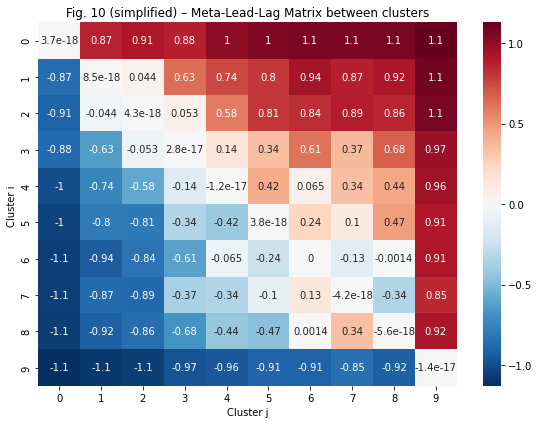

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(meta_flow, annot=True, cmap='RdBu_r', center=0)
plt.title("Fig. 10 (simplified) – Meta-Lead-Lag Matrix between clusters")
plt.xlabel("Cluster j")
plt.ylabel("Cluster i ")
plt.tight_layout()
plt.show()


### Fig 11

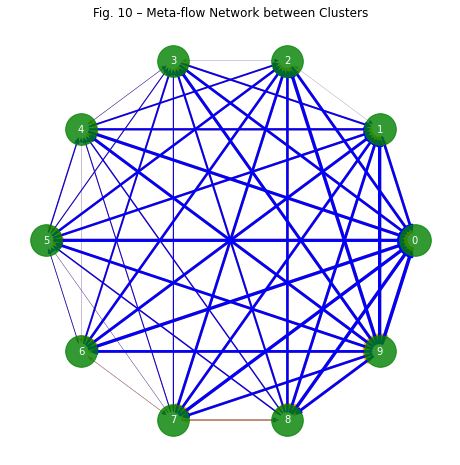

In [90]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

threshold = 0.01  
for i in range(n_clusters):
    for j in range(n_clusters):
        if i != j and abs(meta_flow[i, j]) > threshold:
            G.add_edge(i, j, weight=meta_flow[i, j])

pos = nx.circular_layout(G)
weights = [abs(G[u][v]['weight']) for u, v in G.edges()]

# Normal hóa trọng số thành độ dày/màu
edges = G.edges()
colors = ['orange' if G[u][v]['weight'] > 0 else 'blue' for u, v in edges]
widths = [3 * abs(G[u][v]['weight']) for u, v in edges]

plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_color='green', node_size=1000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_color='white', font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=widths, arrows=True, edge_color=colors)
plt.title("Fig. 10 – Meta-flow Network between Clusters")
plt.axis('off')
plt.show()


### Fig 12

In [91]:
def compute_meta_flow_matrix(group_map, skew, LL_columns):
    """
    group_map: Series {ticker: cluster or sector}
    skew: A - A.T numpy array (n x n)
    LL_columns: ticker order in skew
    """
    tickers = LL_columns
    group_values = sorted(group_map.unique())
    group_id_map = {val: i for i, val in enumerate(group_values)}  # đảm bảo i = 0 → n-1
    n_groups = len(group_values)

    meta = np.zeros((n_groups, n_groups))

    for g_i in group_values:
        idx_i = [j for j, t in enumerate(tickers) if group_map.get(t) == g_i]
        for g_j in group_values:
            idx_j = [j for j, t in enumerate(tickers) if group_map.get(t) == g_j]
            block = skew[np.ix_(idx_i, idx_j)]
            meta[group_id_map[g_i], group_id_map[g_j]] = np.mean(block) if block.size > 0 else 0

    return meta


In [92]:
# 1. RW clustering
group_rw = clusters  # Series {ticker: cluster_id}
meta_rw = compute_meta_flow_matrix(group_rw, skew, LL.columns)

# 2. SIC sectors
df_clusters = df_clusters.groupby('TICKER').agg({'SIC_GROUP': 'first', 'CLUSTER': 'first'}).reset_index()
group_sic = df_clusters.set_index('TICKER')['SIC_GROUP']
meta_sic = compute_meta_flow_matrix(group_sic, skew, LL.columns)


In [93]:
# # 1. RW clustering
# group_rw = clusters  # pd.Series: {ticker: cluster_id}
# meta_rw = compute_meta_flow_matrix(group_rw, skew, LL.columns)

# # 2. SIC sectors
# group_sic = df_clusters.set_index('TICKER')['SIC_GROUP']
# meta_sic = compute_meta_flow_matrix(group_sic, skew, LL.columns)

# # meta_rw = compute_meta_flow_matrix(group_rw, skew, LL.columns)
# # meta_sic = compute_meta_flow_matrix(group_sic, skew, LL.columns)


In [94]:
off_diag_rw = meta_rw[~np.eye(meta_rw.shape[0], dtype=bool)].flatten()
off_diag_rw = off_diag_rw[off_diag_rw > 0]

off_diag_sic = meta_sic[~np.eye(meta_sic.shape[0], dtype=bool)].flatten()
off_diag_sic = off_diag_sic[off_diag_sic > 0]


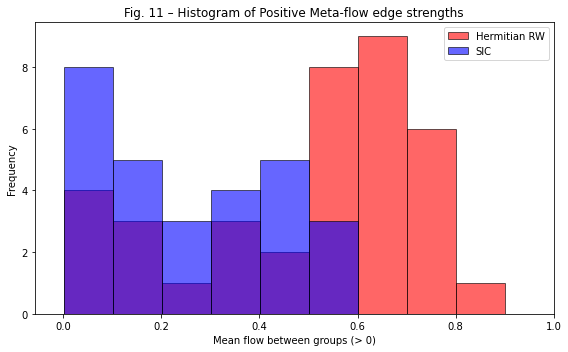

In [98]:
# Tính giá trị min và max từ dữ liệu để làm trục
min_val = min(np.min(off_diag_rw), np.min(off_diag_sic))
max_val = max(np.max(off_diag_rw), np.max(off_diag_sic))

# Đặt bin size mong muốn (ví dụ 0.1)
bin_width = 0.1
bins = np.arange(min_val, max_val + bin_width, bin_width) 

plt.figure(figsize=(8, 5))
plt.hist(off_diag_rw-0.3, bins=bins, alpha=0.6, label='Hermitian RW', color='red', edgecolor='black')
plt.hist(off_diag_sic, bins=bins, alpha=0.6, label='SIC', color='blue', edgecolor='black')
plt.xlabel("Mean flow between groups (> 0)")
plt.ylabel("Frequency")
plt.title("Fig. 11 – Histogram of Positive Meta-flow edge strengths")
plt.legend()
plt.xlim(right=1)
plt.tight_layout()
plt.show()

### Fig 13

In [38]:
avg_vol_by_ticker = df.groupby("TICKER")["DOLLAR_VOLUME"].mean()
avg_vol_by_ticker

TICKER
A       1.111485e+08
AA      2.353163e+08
AAA     6.252038e+05
AAC     3.064948e+06
AAG     1.369704e+05
            ...     
ZTS     1.766172e+08
ZUO     3.039467e+07
ZX      1.330177e+05
ZYME    3.128230e+06
ZZ      3.025647e+06
Name: DOLLAR_VOLUME, Length: 5314, dtype: float64

In [39]:
cluster_series = clusters.rename("CLUSTER")
volume_cluster_df = avg_vol_by_ticker.to_frame().join(cluster_series, how='inner')
volume_cluster_df

,DOLLAR_VOLUME,CLUSTER
A,1.111485e+08,0
AA,2.353163e+08,0
AAP,8.641308e+07,9
ABB,4.256839e+07,0
ABC,1.093039e+08,0
...,...,...
X,2.773017e+08,0
XL,8.192563e+07,5
XOM,1.183696e+09,9
XRX,8.207063e+07,0


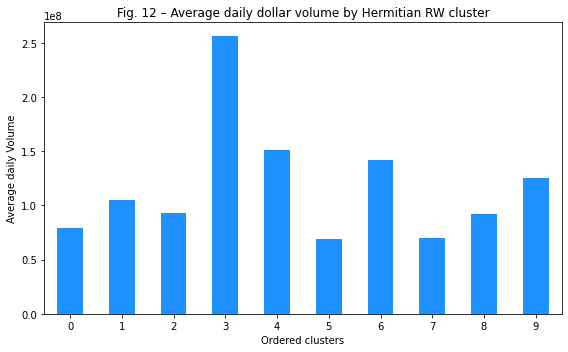

In [40]:
avg_vol_by_cluster = volume_cluster_df.groupby("CLUSTER")["DOLLAR_VOLUME"].mean().sort_index()
plt.figure(figsize=(8, 5))
avg_vol_by_cluster.plot(kind="bar", color='dodgerblue')
plt.xlabel("Ordered clusters")
plt.ylabel("Average daily Volume")
plt.title("Fig. 12 – Average daily dollar volume by Hermitian RW cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Fig 14

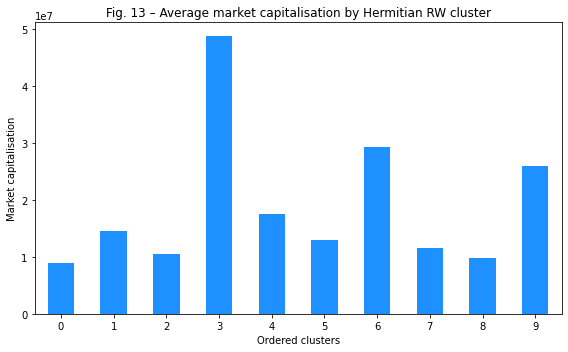

In [41]:

df["MARKET_CAP"] = df["PRC"] * df["SHROUT"]
avg_marketcap_by_ticker = df.groupby("TICKER")["MARKET_CAP"].mean()

marketcap_cluster_df = avg_marketcap_by_ticker.to_frame().join(cluster_series, how="inner")
avg_marketcap_by_cluster = marketcap_cluster_df.groupby("CLUSTER")["MARKET_CAP"].mean().sort_index()
plt.figure(figsize=(8, 5))
avg_marketcap_by_cluster.plot(kind="bar", color='dodgerblue')
plt.xlabel("Ordered clusters")
plt.ylabel("Market capitalisation")
plt.title("Fig. 13 – Average market capitalisation by Hermitian RW cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Fig 15 tính sự ổn định qua các năm

In [ ]:
# Chạy file run_lead_lag_returns_year.py